In [7]:
import sys
sys.path.append('../')

In [8]:
import os
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

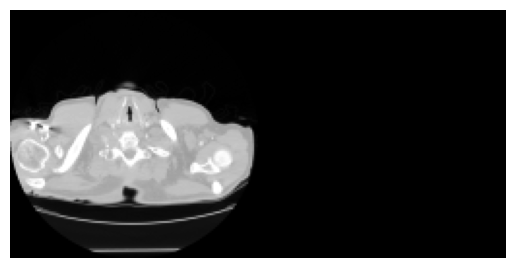

In [9]:
image_folder = '../data/Image/LIDC-IDRI-0011/'
mask_folder = '../data/Mask/LIDC-IDRI-0011/'

image_files = os.listdir(image_folder)
image_files.sort()
images = []
for file in image_files:
    if file.endswith('.npy'):
        data = np.load(image_folder + file)
        # normalize to -1 to 1
        data = (data - data.min()) / (data.max() - data.min())
        data = data * 2 - 1
        images.append(data)

mask_files = os.listdir(mask_folder)
mask_files.sort()
masks = []
for file in mask_files:
    if file.endswith('.npy'):
        data = np.load(mask_folder + file)
        masks.append(data)

# data = []
# for img, mask in zip(images, masks):
#     # concatenate image and mask
#     img = np.concatenate((img, np.where(mask > 0, 1, -1)), axis=1)
#     data.append(img)

fig = plt.figure()
plt.axis("off")
ims = [[plt.imshow(np.concatenate((img, np.where(mask > 0, 1, -1)), axis=1), cmap='gray')] for img, mask in zip(images, masks)]
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat_delay=1000, blit=True)

ani.save("../outputs/image.gif", writer='pillow')